# 第四问代码部分
**第四问分析流程**：
1.提取原数据特征 --> 2.将数据分类，分为10个类 --> 3.从已经分类好的数据中提取出时间序列数据 --> 4.选用分类器对数据进行分类 --> 5.根据分类器得分，选择出随机森林、EM和K近邻分类器，下面对分类器进行参数优化

## 1 提取原数据特征

### 1.1 提取美的暖通数据特征 

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import os
import re

result=[]
for d in range(4,9):
    path = 'E:/中国软件杯2022/美的暖通/2017.'+str(d)  # 输入文件夹地址
    files = list(os.listdir(path))  # 读入文件夹
    for j in range(len(files)):
        s='E:/中国软件杯2022/美的暖通/2017.'+str(d)+'/'+files[j]
        data=pd.read_excel(s)
        data=data.loc[:23,['小时','电量（kWh）']]
        data=np.array(data)

        # 对时间段重新编号
        for i in range(len(data)):
            data[i][0]=i+1

        # 标准化电量
        elec=data[:,1].reshape(-1,1)
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaler.fit(elec)
        elec= scaler.transform(elec).reshape(1,-1)[0]

        # 后项-前项
        e=[]
        for i in range(len(elec)):
            if i!=23:
                e.append(elec[i+1]-elec[i])
            else:
                e.append(-2)
        e=np.array(e)

        # 日期
        p1 = r"\d{4}\D\d{1,2}\D\d{1,3}\D{1}"
        pattern1 = re.compile(p1)
        finish_date = pattern1.findall(files[j])
        results=[finish_date[0]]

        # 上升剧烈的前三个点
        d1=(np.argsort(e)[-3:]+1)[::-1].tolist()
        results.append(d1)

        # 集中用电的五个点
        d2=(np.argsort(elec)[-5:]+1)[::-1].tolist()
        results.append(d2)

        # 下降剧烈的点
        d3=(np.argsort(e)[1:4]+1)[::-1].tolist()
        results.append(d3)

        # 计算标准差
        std=np.std(elec)
        results.append(std)

        # 计算均值
        mea=np.mean(data[:,1].reshape(-1,1))
        results.append(mea)
        result.append(results)
names = ['日期','上升剧烈的点','集中用电的点','下降剧烈的点','标准差','均值']
result=pd.DataFrame(data=result,columns=names)
result.to_csv(r'E:\中国软件杯2022\美的暖通.csv', index=False, encoding='utf-8-sig')
result

日期      上升剧烈的点                集中用电的点        下降剧烈的点       标准差  \
0    2017年04月28日  [8, 13, 9]  [17, 15, 10, 21, 16]  [22, 12, 23]  0.377648   
1    2017年04月29日  [13, 8, 7]   [15, 14, 10, 11, 9]  [17, 22, 12]  0.250236   
2    2017年04月30日  [8, 9, 13]  [17, 15, 16, 14, 10]  [17, 22, 23]  0.394272   
3    2017年04月28日  [8, 13, 9]  [17, 15, 10, 21, 16]  [22, 12, 23]  0.377648   
4    2017年04月29日  [13, 8, 7]   [15, 14, 10, 11, 9]  [17, 22, 12]  0.250236   
..           ...         ...                   ...           ...       ...   
133  2017年08月16日  [8, 9, 13]  [17, 11, 16, 14, 18]  [19, 12, 23]  0.378559   
134  2017年08月17日  [8, 9, 13]  [17, 11, 15, 16, 18]  [21, 23, 12]  0.372487   
135  2017年08月18日  [8, 13, 9]  [15, 17, 11, 16, 14]  [23, 21, 12]  0.376089   
136  2017年08月19日  [8, 13, 9]  [14, 11, 18, 10, 19]  [15, 12, 23]  0.378183   
137  2017年08月20日  [8, 9, 13]  [11, 10, 14, 12, 15]  [12, 15, 16]  0.317285   

              均值  
0    7304.209375  
1    4667.809458  
2    6295.234333  
3    7304.209375  
4    4667.809458  
..           ...  
133  8323.797167  
134  8578.246250  
135  8848.040333  
136  8534.629250  
137  6984.272083  

[138 rows x 6 columns]

### 1.2 提取芙蓉兴国数据特征

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import os
import re

path = 'E:/中国软件杯2022/芙蓉兴国/mewtown'
files = list(os.listdir(path))  # 读入文件夹
for j in range(len(files)):
    result = []
    s='E:/中国软件杯2022/芙蓉兴国/mewtown/'+files[j]
    file=list(os.listdir(s))
    for k in file:
        data=pd.read_excel(s+'/'+k)
        data=data.loc[:23,['小时','电量（kWh）']]
        data=np.array(data)
        
        # 对于整个数据倒序
        data=data[::-1]
        
        # 对时间段重新编号
        for i in range(len(data)):
            data[i][0]=i+1
            
        # 标准化电量
        elec=data[:,1].reshape(-1,1)
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaler.fit(elec)
        elec= scaler.transform(elec).reshape(1,-1)[0]
        
        # 后项-前项
        e=[]
        for i in range(len(elec)):
            if i!=23:
                e.append(elec[i+1]-elec[i])
            else:
                e.append(-2)
        e=np.array(e)
        
        # 日期
        p1 = r"\d{4}\D\d{1,2}\D\d{1,3}\D{1}"
        pattern1 = re.compile(p1)
        finish_date = pattern1.findall(k)
        results=[finish_date[0]]
        
        # 上升剧烈的前三个点
        d1=(np.argsort(e)[-3:]+1)[::-1].tolist()
        results.append(d1)
        # 集中用电的五个点
        d2=(np.argsort(elec)[-5:]+1)[::-1].tolist()
        results.append(d2)
        
        # 下降剧烈的点
        d3=(np.argsort(e)[1:4]+1)[::-1].tolist()
        results.append(d3)
        
        # 计算标准差
        std=np.std(elec)
        results.append(std)
        
        # 计算均值
        mea=np.mean(data[:,1].reshape(-1,1))
        results.append(mea)
        result.append(results)
        
    names = ['日期','上升剧烈的点','集中用电的点','下降剧烈的点','标准差','均值']
    result=pd.DataFrame(data=result,columns=names)
    result.to_csv(r'E:\中国软件杯2022\芙蓉兴国\用户分类前\芙蓉兴国'+files[j]+'.csv', index=False, encoding='utf-8-sig')

#### 得到结果如下所示

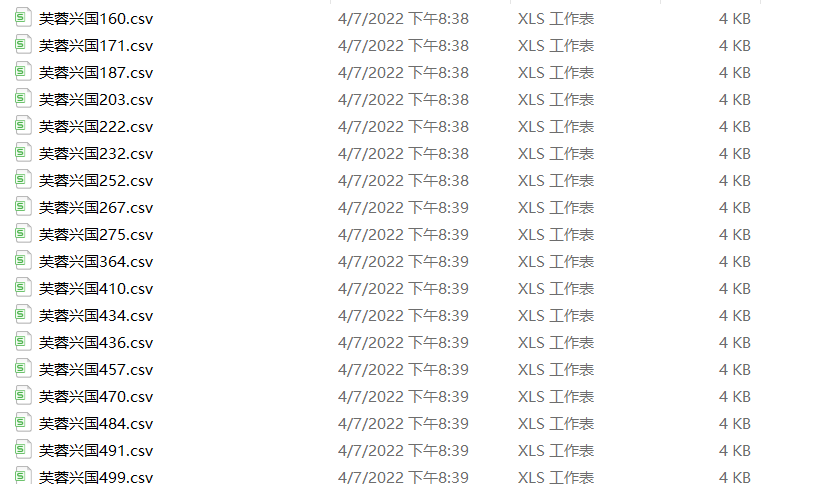

## 2 将数据分类，分为10个类

In [22]:
import pandas as pd
import numpy as np
import os
import re

path = 'E:/中国软件杯2022/芙蓉兴国/用户分类前'
files = list(os.listdir(path))  # 读入文件夹
for f in files:
    data=pd.read_csv(path+'/'+f)
    std=np.array(data['标准差'])
    mea=np.array(data['均值'])
    # c1
    c1=[]
    for i in std:
        if i<0.35:
            c1.append(1)
        else:
            c1.append(2)
    # c2
    c2=[]
    for i in mea:
        if 0<=i<1:
            c2.append(1)
        elif 1<=i<3:
            c2.append(2)
        elif 3<=i<9:
            c2.append(3)
        elif 9<=i<20:
            c2.append(4)
        elif 20<=i:
            c2.append(5)
    # c
    c=[]
    for i in range(len(c1)):
        if c1[i]==1:
            c.append(c1[i]*c2[i])
        else:
            c.append(c2[i]+5)

    c=pd.DataFrame(data=c,columns=['class'])
    data=pd.concat([data,c],axis=1)
    data.to_csv(rf'E:/中国软件杯2022/芙蓉兴国/用户分类前/{f}', index=False, encoding='utf-8-sig')

#### 分类结果如下所示（局部）

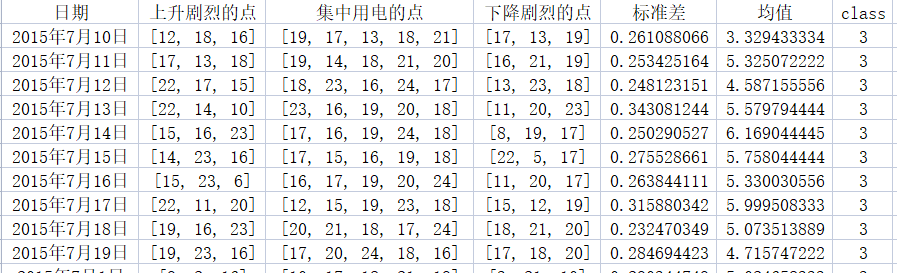

## 3 从已经分类好的数据中提取出时间序列数据

In [25]:
import pandas as pd
total_class = pd.read_csv(r'E:\中国软件杯2022\分类数据美的.csv',encoding='gbk')
date_lst = total_class.iloc[:,0]
class_lst = total_class.iloc[:,8]
total_class

日期        上升剧烈的点                集中用电的点        下降剧烈的点       标准差  \
0    2017年6月14日    [8, 9, 13]  [17, 10, 11, 14, 15]  [11, 23, 12]  0.380313   
1    2017年6月15日    [8, 13, 9]  [17, 19, 16, 18, 15]  [19, 12, 23]  0.365856   
2     2017年6月7日    [8, 13, 9]  [15, 17, 14, 16, 11]  [17, 23, 12]  0.374307   
3     2017年6月6日    [8, 13, 9]  [17, 16, 15, 14, 11]  [23, 12, 21]  0.371637   
4    2017年6月16日    [8, 13, 9]  [11, 18, 17, 10, 19]  [19, 12, 23]  0.376087   
..          ...           ...                   ...           ...       ...   
110   2017年8月8日  [17, 14, 12]       [1, 3, 2, 4, 5]    [18, 8, 5]  0.351210   
111   2017年8月9日   [8, 14, 11]  [17, 16, 18, 15, 12]  [12, 19, 18]  0.299302   
112  2017年7月24日    [8, 9, 13]  [11, 17, 14, 16, 15]  [12, 21, 23]  0.404714   
113  2017年7月17日    [9, 8, 13]  [15, 16, 17, 11, 14]  [19, 23, 12]  0.403700   
114  2017年7月10日     [8, 9, 7]  [17, 18, 15, 11, 16]  [19, 12, 23]  0.404600   

               均值  class1  class2  class  
0    10108.672460       1       5      5  
1     9997.807625       1       5      5  
2     9989.756042       1       5      5  
3     9987.942167       1       5      5  
4     9951.427083       1       5      5  
..            ...     ...     ...    ...  
110   1088.220458       1       5      5  
111    887.046750       1       5      5  
112   8366.070375       2       5     10  
113   7923.695625       2       5     10  
114   7645.697000       2       5     10  

[115 rows x 9 columns]

### 3.1 提取所有文件夹的名称

In [24]:
import glob
import os
import re
import pandas as pd

folder = r'E:\中国软件杯2022\芙蓉兴国分类数据'
furong_name_lst = [d for d in glob.glob(os.path.join(folder,'*.csv'))]

folder = r'E:\中国软件杯2022\different'
time_data_lst = [d for d in glob.glob(os.path.join(folder,'*.csv'))]

### 3.2 抽取出所有时间序列数据

In [9]:
df_total_simple = pd.DataFrame()
for i in furong_name_lst:
    temp_user_id = re.search("(\d{2,4}).csv",f"{i}").group(1)
    temp_data = pd.read_csv(rf'{i}')
    temp_date_same_user = temp_data['日期']
    for j in range(len(temp_date_same_user)):
        temp_trans_date = temp_date_same_user[j].replace('月','-')
        temp_trans_date = temp_trans_date.replace('年','-')
        temp_trans_date = temp_trans_date.replace('日','')
        temp_class = temp_data.iloc[j,6]
        for k in time_data_lst:
            try:
                temp_user_date_data_name = re.search(fr'.*(用户{temp_user_id}及{temp_trans_date}.csv)',k).group(1)
            except:
                continue
        temp_user_date_data = pd.read_csv(rf'E:\中国软件杯2022\different\{temp_user_date_data_name}')
        temp_power_data = temp_user_date_data.iloc[:,2].tolist()
        temp_power_data.append(temp_class)
        temp_one_row = pd.DataFrame(temp_power_data,columns=[f'{temp_user_id}-{temp_date_same_user[j]}'])
        df_total_simple = pd.concat([df_total_simple,temp_one_row],axis=1)
df_total_simple

101-2015年7月10日  101-2015年7月11日  101-2015年7月12日  101-2015年7月13日  \
0         2.864800        4.828533        4.602600        4.004000   
1         3.686333        3.796667       12.802867        3.981000   
2         2.575133        1.550600       14.675200        2.338000   
3         6.193267        4.376067       19.530067        6.356667   
4         7.140267        5.616733        7.989667        6.018867   
5         8.255800        6.395867        8.116467        6.112133   
6        10.260933        7.181800        7.583467        6.451733   
7        20.429133        7.828867        6.415667        6.238933   
8         7.647000       12.617133        7.556267        7.450000   
9         4.702333        7.197133        7.435400       11.086267   
10        4.435267        6.238533        7.195000        5.532533   
11        5.242267        5.909067        7.754800        3.635333   
12        5.674667        4.743800        6.641467        3.197933   
13        4.634800        3.850067        7.418933        2.311867   
14        3.514467        3.602067        4.958667        2.799933   
15        2.877800        4.619733        4.558733        1.097600   
16        2.967267        1.635400        3.250867        2.054933   
17        3.607667        2.174333        3.409867        2.309000   
18        2.630067        2.180733        3.854600        2.923600   
19        3.825400        1.669667        4.330533        2.489667   
20        3.575600        1.931467        4.226600        2.340400   
21        2.419800        2.082333        4.058800        3.439467   
22        3.136400        2.587400        4.184667        4.273400   
23        3.641533        2.399933        5.000867        4.428200   
24        3.000000        3.000000        3.000000        3.000000   

    101-2015年7月14日  101-2015年7月15日  101-2015年7月16日  101-2015年7月17日  \
0         4.368067        3.521333        3.932733        3.909267   
1         4.817667        2.853067        3.554133        3.360667   
2         3.980267        2.230933        2.325933        2.540000   
3         6.757333        5.495667        5.873133        6.910133   
4         7.398667        6.316333        6.732800        7.593067   
5         7.882333        6.729600        8.110933        6.714200   
6         8.704467        6.818600        6.453533        6.435200   
7         8.154067        4.722800        4.575067        4.757667   
8         6.573467        4.552600        4.294867        5.170933   
9         5.642333        4.433667        3.426667        4.450133   
10        5.615400        5.326533        3.976867        3.778133   
11        5.398733        5.523000        3.196467        3.588600   
12        3.320667        2.169333        2.533133        4.884400   
13        3.630667        2.104800        2.674600        3.902800   
14        2.839333        2.223400        1.958267        3.392067   
15        3.308867        1.175000        1.732067        2.842400   
16        3.041400        1.932333        2.584800        4.008200   
17        3.471733        2.225267        2.692800        3.641000   
18        3.548000        2.272933        2.847267        3.989867   
19        3.828333        2.999667        3.536867        4.712600   
20        3.382000        3.123600        2.773933        4.048000   
21        3.523133        3.508467        3.054067        4.068667   
22        3.832867        3.841200        2.854667        4.207133   
23        4.248467        4.240133        3.163200        3.879933   
24        3.000000        3.000000        3.000000        3.000000   

    101-2015年7月18日  101-2015年7月19日  ...  994-2015年7月2日  994-2015年7月30日  \
0         5.726600        5.251067  ...       4.751400        8.722400   
1         4.262400        8.945533  ...       8.312600        9.227333   
2         3.166533       12.233267  ...       8.419667       14.323067   
3         8.049600        6.661333  ...       4.695800       11.15

### 3.3 将数据存入result.csv文件

In [11]:
df_total_simple.to_csv(r'E:\中国软件杯2022\result.csv',index=None)

### 3.4 另一个数据使用同样方法提取时间序列

In [12]:
import glob
import os
folder = r'E:\中国软件杯2022\美的暖通\美的暖通'
time_data_lst = [d for d in glob.glob(os.path.join(folder,'*.xls'))]

In [14]:
import pandas as pd
import re

df_total_simple = pd.DataFrame()
meidi_data = pd.read_csv(r'E:\中国软件杯2022\分类数据美的.csv',encoding='gbk')
date_lst = meidi_data.iloc[:,0]
for j in range(len(date_lst)):
    temp_class = meidi_data.iloc[j,8]
    temp_date_str = date_lst[j].replace('年','-')
    temp_date_str = temp_date_str.replace('月','-')
    temp_date_str = temp_date_str.replace('日','')
    year,month,day = temp_date_str.split('-')
    for k in time_data_lst:
        try:
            temp_date_name = re.search(fr'(.*{year}年[0]?{month}月[0]?{day}日.*)',k).group(1)
        except:
            continue
    temp_data_every_day = pd.read_excel(fr'{temp_date_name}')
    temp_power_data = temp_data_every_day.iloc[0:24,2].tolist()
    temp_power_data.append(temp_class)
    temp_one_row = pd.DataFrame(temp_power_data,columns=[f'美的暖通-{date_lst[j]}'])
    df_total_simple = pd.concat([df_total_simple,temp_one_row],axis=1)
df_total_simple

美的暖通-2017年6月14日  美的暖通-2017年6月15日  美的暖通-2017年6月7日  美的暖通-2017年6月6日  \
0          6976.522         6664.072        6847.061        6535.154   
1          7382.356         6729.576        6959.704        6452.257   
2          7304.137         6776.232        6962.575        6461.012   
3          7208.559         6627.644        6743.434        6274.364   
4          6976.657         6473.433        6625.765        6219.593   
5          7165.116         6685.203        6748.543        6384.397   
6          7172.936         6750.953        6597.017        6526.251   
7          8255.404         7761.988        7729.831        7747.975   
8         10654.448        10306.798       10160.571       10579.151   
9         12505.901        11582.937       11950.297       12354.701   
10        12325.646        12117.087       12491.300       12769.085   
11        11539.733        11399.647       11952.849       11908.215   
12        10451.603        10294.923       10511.052       10712.121   
13        12270.559        12293.241       12706.397       12920.156   
14        12208.224        12471.940       13064.172       12976.776   
15        12142.892        12634.294       12698.815       13110.601   
16        12577.511        13141.527       13059.479       13335.454   
17        12044.568        12590.881       12390.073       12327.019   
18        12119.850        12672.084       12134.449       12020.669   
19        11401.189        11933.072       11589.519       11762.121   
20        11445.381        11681.599       10922.517       11534.700   
21        10779.817        10997.511       10278.434       10177.559   
22        10386.821        10497.034        9947.927        9821.216   
23         9312.309         8863.707        8682.364        8800.065   
24            5.000            5.000           5.000           5.000   

    美的暖通-2017年6月16日  美的暖通-2017年6月8日  美的暖通-2017年6月27日  美的暖通-2017年6月22日  \
0          7192.544        6914.148         6521.641         6441.265   
1          7490.105        7171.761         6753.900         6822.256   
2          7272.688        6957.120         6575.627         6898.243   
3          6948.480        6614.329         6255.873         6568.138   
4          6952.443        6655.436         6281.834         6639.016   
5          7109.747        6736.563         6322.172         6852.707   
6          7061.544        6765.006         6368.213         7021.163   
7          8295.015        8148.652         7659.910         8111.137   
8         10829.080       10404.080        10044.926        10563.200   
9         12254.890       11975.208        12315.033        12130.294   
10        12715.611       12554.487        12929.438        12312.313   
11        11742.651       11882.280        12254.733        10728.630   
12        10344.623       10388.407        11159.564         9902.748   
13        12131.025       12472.169        12843.822        11832.575   
14        12117.560       12459.924        13042.686        12002.991   
15        12037.679       12154.123        12626.411        11694.314   
16        12629.166       12312.401        12235.634        11921.555   
17        12713.449       11927.375        11693.960        12013.351   
18        12178.015       11943.591        11289.855        12035.031   
19        10867.836       11159.813        10804.440        11329.140   
20        10362.015       10648.387        10953.620        11387.052   
21         9750.716        9828.431        10198.716        10582.761   
22         9647.695        9645.835         9827.152        10029.276   
23         8189.673        8500.773         8411.946         8684.280   
24            5.000           5.000            5.000            5.000   

    美的暖通-2017年6月13日  美的暖通-2017年6月9日  ...  美的暖通-2017年4月29日  美的暖通-2017年7月9日  \
0          6454.352        6942.467  ...         4429.792        5183.657   
1          6777.852        6997.808  ...         4179.673        5218.813   
2

### 3.5 合并两次数据列，得到最终数据列Classfied_result.csv

In [16]:
df1 = pd.read_csv(r'E:\中国软件杯2022\result.csv')
lst = [df_total_simple,df1]
result = pd.concat(lst,axis=1)
result.to_csv(r'E:\中国软件杯2022\Classfied_result.csv',encoding='utf-8',index=None)

## 4 选用分类器对数据进行分类

### 4.1 导入数据，并对数据进行划分，得到训练集和测试集

In [5]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import warnings
from sklearn import metrics
from pyts.transformation import ShapeletTransform
from pyts.datasets import load_gunpoint
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from pyts.transformation import ShapeletTransform
import random

df = pd.read_csv(r'E:\中国软件杯2022\Classfied_result.csv',encoding='gbk')
train_length = 1000 #修改
index_list = random.sample(range(0, len(df.T)), train_length)
X_train = []
Y_train = []
X_test = []
Y_test = []
for i in range(len(df.T)):
    if i in index_list:
        X_train.append(df.T.iloc[i,0:24].tolist())
        Y_train.append(df.T.iloc[i,24])
    else:
        X_test.append(df.T.iloc[i,0:24].tolist())
        Y_test.append(df.T.iloc[i,24])
Y_train = [int(i) for i in Y_train]
Y_test = [int(i) for i in Y_test]

### 4.2 对数据进行Shapelet转化，对转换后的数据进行分类，下面尝试使用了众多分类器，选择最优的三个分类器进行参数优化。

In [1]:
shapelet = ShapeletTransform(n_shapelets=100, window_sizes=[3])
# 随机森林
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier()
clf = make_pipeline(shapelet, rfc_model)
clf.fit(X_train, Y_train)
score = clf.score(X_test, Y_test)
print("The following score was achieved on the test set: ", score) 

# ET
from sklearn.ensemble import ExtraTreesClassifier
et_model=ExtraTreesClassifier()
clf = make_pipeline(shapelet, et_model)
clf.fit(X_train, Y_train)
score = clf.score(X_test, Y_test)
print("The following score was achieved on the test set: ", score) 

# 朴素贝叶斯
from sklearn.naive_bayes import GaussianNB
gnb_model=GaussianNB()
clf = make_pipeline(shapelet, gnb_model)
clf.fit(X_train, Y_train)
score = clf.score(X_test, Y_test)
print("The following score was achieved on the test set: ", score) 

#K最近邻
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
clf = make_pipeline(shapelet, knn_model)
clf.fit(X_train, Y_train)
score = clf.score(X_test, Y_test)
print("The following score was achieved on the test set: ", score) 

#逻辑回归
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
clf = make_pipeline(shapelet, lr_model)
clf.fit(X_train, Y_train)
score = clf.score(X_test, Y_test)
print("The following score was achieved on the test set: ", score) 

#决策树
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
clf = make_pipeline(shapelet, dt_model)
clf.fit(X_train, Y_train)
score = clf.score(X_test, Y_test)
print("The following score was achieved on the test set: ", score) 

## 5 根据分类器得分，选择出随机森林、EM和K近邻分类器，下面对分类器进行参数优化

## 5.1 优化随机森林参数

### 5.1.1 优化随机森林的n_estimators参数

In [ ]:
import time
T1 = time.time()
score2 = []
shapelet = ShapeletTransform(n_shapelets=100, window_sizes=[3])
for i in range(30,45):
    rfc = RandomForestClassifier(n_estimators=i, n_jobs=-1, random_state=90)
    clf = make_pipeline(shapelet, rfc)
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    print(f'参数n_estimators为{i}的情况下，随机森林模型得分为{score}')
    score2.append(score) 
print(max(score2),([*range(30,45)][score2.index(max(score2))])) 
plt.figure(figsize=[20,5]) 
plt.plot(range(30,45),score2) 
plt.show()
T2 = time.time()
print('程序运行时间:%s秒' % ((T2 - T1)))

### 5.1.2 优化随机森林的max_features参数

In [ ]:
import time
T1 = time.time()
score2 = []
shapelet = ShapeletTransform(n_shapelets=100, window_sizes=[3])
for i in range(5,15):
    rfc = RandomForestClassifier(n_estimators=36,max_depth=4,max_features=i, random_state=90)
    clf = make_pipeline(shapelet, rfc)
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    print(f'参数max_features为{i}的情况下，随机森林模型得分为{score}')
    score2.append(score) 
print(max(score2),([*range(5,15)][score2.index(max(score2))])) 
plt.figure(figsize=[20,5]) 
plt.plot(range(5,15),score2) 
plt.show()
T2 = time.time()
print('程序运行时间:%s秒' % ((T2 - T1)))

### 5.1.3 优化随机森林的min_samples_split参数

In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier
T1 = time.time()
score2 = []
shapelet = ShapeletTransform(n_shapelets=100, window_sizes=[3])
for i in range(2,22):
    rfc = RandomForestClassifier(n_estimators=36,max_depth=4, random_state=90,max_features=14,min_samples_split=i)
    clf = make_pipeline(shapelet, rfc)
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    print(f'参数min_samples_split为{i}的情况下，随机森林模型得分为{score}')
    score2.append(score) 
print(max(score2),([*range(2,22)][score2.index(max(score2))])) 
plt.figure(figsize=[20,5]) 
plt.plot(range(2,22),score2) 
plt.show()
T2 = time.time()
print('程序运行时间:%s秒' % ((T2 - T1)))

### 5.1.4 优化随机森林的min_samples_leaf参数

In [ ]:
import time
T1 = time.time()
score2 = []
shapelet = ShapeletTransform(n_shapelets=100, window_sizes=[3])
for i in range(1,11):
    rfc = RandomForestClassifier(n_estimators=36,max_depth=4, random_state=90,max_features=14,min_samples_leaf=i)
    clf = make_pipeline(shapelet, rfc)
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    print(f'参数min_samples_leaf为{i}的情况下，随机森林模型得分为{score}')
    score2.append(score) 
print(max(score2),([*range(1,11)][score2.index(max(score2))])) 
plt.figure(figsize=[20,5]) 
plt.plot(range(1,11),score2) 
plt.show()
T2 = time.time()
print('程序运行时间:%s秒' % ((T2 - T1)))

### 5.1.5 优化随机森林的criterion参数

In [ ]:
shapelet = ShapeletTransform(n_shapelets=100, window_sizes=[3])
rfc = RandomForestClassifier(n_estimators=36,max_depth=4, random_state=90,max_features=14,criterion='gini')
clf = make_pipeline(shapelet, rfc)
clf.fit(X_train, Y_train)
score = clf.score(X_test, Y_test)
print(f'参数criterion为gini的情况下，随机森林模型得分为{score}')
rfc = RandomForestClassifier(n_estimators=36,max_depth=4, random_state=90,max_features=14,criterion='entropy')
clf = make_pipeline(shapelet, rfc)
clf.fit(X_train, Y_train)
score = clf.score(X_test, Y_test)
print(f'参数criterion为entropy的情况下，随机森林模型得分为{score}')

###  5.1.6 得到随机森林的最优参数
```python
    n_estimators=36,
    max_depth=4,
    random_state=90,
    max_features=14,
    min_samples_split=3,
    min_samples_leaf=3,
    criterion='gini'
```

## 5.2 优化EM模型参数

### 5.2.1 优化EM模型的max_depth参数

In [ ]:
for i in range(1,21):
    Et_model=ExtraTreesClassifier(n_estimators=49,
                              criterion='gini',
                              max_depth=i,
                              min_samples_split=2,
                              min_samples_leaf=1,
                              min_weight_fraction_leaf=0.0,
                              max_features='auto',
                              max_leaf_nodes=None, 
                              min_impurity_decrease=0.0,  
                              bootstrap=False, 
                              oob_score=False, 
                              n_jobs=None, 
                              random_state=None, 
                              verbose=0,
                              warm_start=False,
                              class_weight=None,
                              ccp_alpha=0.0,
                              max_samples=None)
    clf = make_pipeline(shapelet, Et_model)
    clf.fit(x_train, y_train)
    print('max_depth:',i)
    print('ET模型得分:',clf.score(x_test, y_test))

### 5.2.2 优化EM模型的min_samples_split参数

In [ ]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
for i in min_samples_splits:
    Et_model=ExtraTreesClassifier(n_estimators=49,
                              criterion='gini',
                              max_depth=8,
                              min_samples_split=i,
                              min_samples_leaf=1,
                              min_weight_fraction_leaf=0.0,
                              max_features='auto',
                              max_leaf_nodes=None, 
                              min_impurity_decrease=0.0,  
                              bootstrap=False, 
                              oob_score=False, 
                              n_jobs=None, 
                              random_state=None, 
                              verbose=0,
                              warm_start=False,
                              class_weight=None,
                              ccp_alpha=0.0,
                              max_samples=None)
    clf = make_pipeline(shapelet, Et_model)
    clf.fit(x_train, y_train)
    print('min_samples_split:',i)
    print('ET模型得分:',clf.score(x_test, y_test))

### 5.2.3 优化EM模型的min_samples_leafs参数

In [ ]:
min_samples_leafs = np.linspace(0.1,0.5,10, endpoint=True)
for i in min_samples_leafs:
    Et_model=ExtraTreesClassifier(n_estimators=49,
                              criterion='gini',
                              max_depth=8,
                              min_samples_split=5,
                              min_samples_leaf=i,
                              min_weight_fraction_leaf=0.0,
                              max_features='auto',
                              max_leaf_nodes=None, 
                              min_impurity_decrease=0.0,  
                              bootstrap=False, 
                              oob_score=False, 
                              n_jobs=None, 
                              random_state=None, 
                              verbose=0,
                              warm_start=False,
                              class_weight=None,
                              ccp_alpha=0.0,
                              max_samples=None)
    clf = make_pipeline(shapelet, Et_model)
    clf.fit(x_train, y_train)
    print('min_samples_leaf:',i)
    print('ET模型得分:',clf.score(x_test, y_test))            

### 5.2.4 优化EM模型的criterion参数

In [ ]:
max_feature=['auto','sqrt','log2']
for i in max_feature:
    Et_model=ExtraTreesClassifier(n_estimators=49,
                              criterion='gini',
                              max_depth=8,
                              min_samples_split=5,
                              min_samples_leaf=1,
                              min_weight_fraction_leaf=0.0,
                              max_features=i,
                              max_leaf_nodes=None, 
                              min_impurity_decrease=0.0,  
                              bootstrap=False, 
                              oob_score=False, 
                              n_jobs=None, 
                              random_state=None, 
                              verbose=0,
                              warm_start=False,
                              class_weight=None,
                              ccp_alpha=0.0,
                              max_samples=None)
    clf = make_pipeline(shapelet, Et_model)
    clf.fit(x_train, y_train)
    print('max_features:',i)
    print('ET模型得分:',clf.score(x_test, y_test))


### 5.2.5 得到EM模型最优参数
```python
    n_estimators=49,
    criterion='gini',
    max_depth=8,
    min_samples_split=5
```

## 5.3 优化K近邻模型参数

### 5.3.1 优化K近邻模型的n_neighbors参数

In [ ]:
import time
from sklearn.neighbors import KNeighborsClassifier
#K最近邻
score2=[]
T1 = time.time()
shapelet = ShapeletTransform(n_shapelets=100, window_sizes=[3])
from sklearn.model_selection import cross_val_score
for i in range(13,17):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    clf4 = make_pipeline(shapelet, knn_model)
    clf4.fit(X_train, Y_train)
    score=clf4.score(X_test, Y_test)
    print(f'参数n_neighbors为{i}时,，K近邻模型得分为：{score}')
    score2.append(score)
T2 = time.time()
print('程序运行时间:%s秒' % ((T2 - T1)))

### 5.3.2 优化K近邻模型的leaf_size参数

In [ ]:
import time
from sklearn.neighbors import KNeighborsClassifier
#K最近邻
score2=[]
T1 = time.time()
shapelet = ShapeletTransform(n_shapelets=100, window_sizes=[3])
from sklearn.model_selection import cross_val_score
for i in range(20,40):
    knn_model = KNeighborsClassifier(n_neighbors=13,leaf_size=i)
    clf4 = make_pipeline(shapelet, knn_model)
    clf4.fit(X_train, Y_train)
    score=clf4.score(X_test, Y_test)
    print(f'参数leaf_size为{i}时,，K近邻模型得分为：{score}')
    score2.append(score)
T2 = time.time()
print('程序运行时间:%s秒' % ((T2 - T1)))


### 5.3.3 得到K近邻模型的最优参数
```python
    n_neighbors=13,
    leaf_size=30
```

## 6 根据最优参数，训练并保存模型

In [15]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import warnings
from sklearn import metrics
from pyts.transformation import ShapeletTransform
from pyts.datasets import load_gunpoint
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from pyts.transformation import ShapeletTransform
import random
import os
import joblib

df = pd.read_csv(r'E:\中国软件杯2022\Classfied_result.csv',encoding='gbk')
train_length = 1000 #修改
index_list = random.sample(range(0, len(df.T)), train_length)
X_train = []
Y_train = []
X_test = []
Y_test = []
for i in range(len(df.T)):
    if i in index_list:
        X_train.append(df.T.iloc[i,0:24].tolist())
        Y_train.append(df.T.iloc[i,24])
    else:
        X_test.append(df.T.iloc[i,0:24].tolist())
        Y_test.append(df.T.iloc[i,24])
Y_train = [int(i) for i in Y_train]
Y_test = [int(i) for i in Y_test]

In [ ]:
# 创建文件目录
dirs = 'model'
if not os.path.exists(dirs):
    os.makedirs(dirs)

shapelet = ShapeletTransform(n_shapelets=100, window_sizes=[3])

# 随机森林
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier(n_estimators=36,
                                max_depth=4,
                                random_state=90,
                                max_features=14,
                                min_samples_split=3,
                                min_samples_leaf=3,
                                criterion='gini')
clf = make_pipeline(shapelet, rfc_model)
clf.fit(X_train, Y_train)
# 保存模型
joblib.dump(clf, dirs+'/RF.mdl')
score = clf.score(X_test, Y_test)
print("The following score was achieved on the test set: ", score)

# ET
from sklearn.ensemble import ExtraTreesClassifier
et_model=ExtraTreesClassifier(n_estimators=49,
                            criterion='gini',
                            max_depth=8,
                            min_samples_split=5)
clf = make_pipeline(shapelet, et_model)
clf.fit(X_train, Y_train)
# 保存模型
joblib.dump(clf, dirs+'/ET.mdl')
score = clf.score(X_test, Y_test)
print("The following score was achieved on the test set: ", score) 

#K最近邻
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=13,
                                leaf_size=30)
clf = make_pipeline(shapelet, knn_model)
clf.fit(X_train, Y_train)
# 保存模型
joblib.dump(clf, dirs+'/K近邻.mdl')
score = clf.score(X_test, Y_test)
print("The following score was achieved on the test set: ", score)      